In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
%matplotlib inline

In [4]:
data = pd.read_csv('../Data/clean_resume_data.csv')

In [5]:
data.head()
print(data['Feature'][1])

hr specialist hr operations summary media professional background communications marketing human resources technology experience current hr specialist hr operations company name city state managed communication regarding launch operations group policy changes system outages designed standard work job aids create comprehensive training program new employees contractors audited job postings old pending hold draft positions audited union hourly union hourly salary background checks drug screens conducted monthly new hire benefits briefing new employees business units served link hr managers vendors handling questions resolving system related issues provide real time process improvement feedback key metrics initiatives successfully branded hr operations sharepoint site business unit project manager rfi rfp check drug screen vendor marketing communications co op company name city state posted new articles changes updates corporate sharepoint site including graphics visual communications res

In [6]:
data.shape

(2484, 3)

In [7]:
data['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

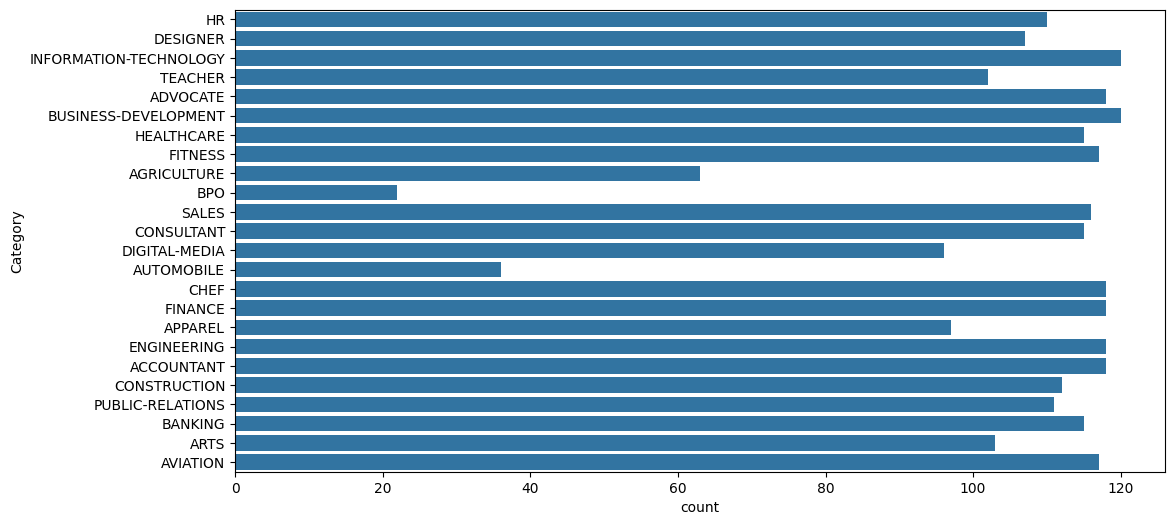

In [8]:
matplotlib.rcParams['figure.figsize']=(12,6)

sns.countplot(y='Category',data=data)

([<matplotlib.patches.Wedge at 0x15fecca73d0>,
 [Text(1.0873558985304643, 0.16630438939188294, 'INFORMATION-TECHNOLOGY'),
  Text(0.9879404766659289, 0.483708191542274, 'BUSINESS-DEVELOPMENT'),
  Text(0.8001110148396715, 0.7548657920002939, 'ADVOCATE'),
  Text(0.5427552970145121, 0.9567741047722231, 'CHEF'),
  Text(0.2374045338432916, 1.0740759225076455, 'ENGINEERING'),
  Text(-0.08893988033794423, 1.0963985122597861, 'ACCOUNTANT'),
  Text(-0.40741943831722166, 1.0217677824639413, 'FINANCE'),
  Text(-0.6887871215943964, 0.8576551178216723, 'FITNESS'),
  Text(-0.9089746228635491, 0.6194878005175475, 'AVIATION'),
  Text(-1.0497142428046182, 0.3287856573105451, 'SALES'),
  Text(-1.099928739161177, 0.012520733497043118, 'BANKING'),
  Text(-1.0573112973650307, -0.3034679891920658, 'HEALTHCARE'),
  Text(-0.9258571907028171, -0.5939599838574039, 'CONSULTANT'),
  Text(-0.7197732137004842, -0.8318212072550673, 'CONSTRUCTION'),
  Text(-0.45983078365386687, -0.9992775642454258, 'PUBLIC-RELATIONS')

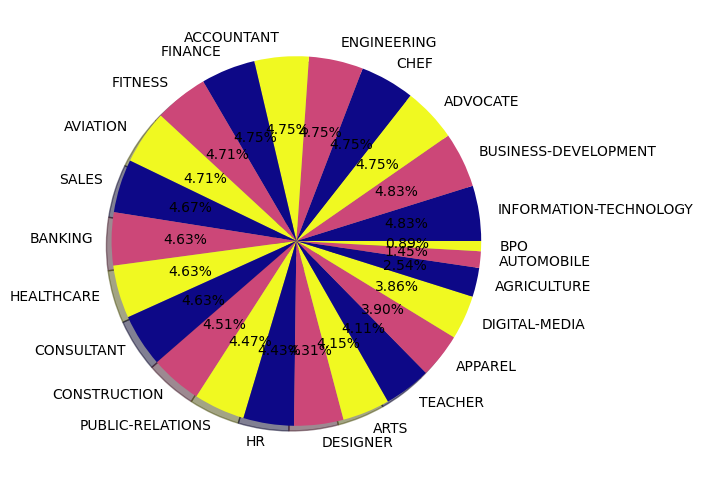

In [9]:
category_val = data['Category'].value_counts().values
category_idx = data['Category'].value_counts().index
plt.pie(category_val,labels=category_idx,autopct='%1.2f%%',shadow=True,colors=plt.cm.plasma(np.linspace(0,1,3)))

In [10]:
from sklearn.utils import resample

max_count = data['Category'].value_counts().max()
balanced_data=[]
for category in data['Category'].unique():
    category_data = data[data['Category']==category]
    if len(category_data)<max_count:
        balanced_category_data = resample(category_data,replace=True, n_samples=max_count,random_state=42)
    else:
        balanced_category_data = resample(category_data,replace=False, n_samples=max_count,random_state=42)
    balanced_data.append(balanced_category_data)
balanced_df =pd.concat(balanced_data)
balanced_df

,ID,Category,Feature
102,10399912,HR,hr personnel assistant summary u citizen autho...
51,39650734,HR,hr assistant summary hard worker dedicated det...
92,23510685,HR,global hr manager summary global hr profession...
14,27490876,HR,hr coordinator summary applicant screening bac...
106,24402267,HR,designation hr assistant professional summary ...
...,...,...,...
2390,26888302,AVIATION,aviation fuel quality control specialist profe...
2392,81588968,AVIATION,superintendent ii summary solutions focused ve...
2455,27512470,AVIATION,assistant cfo professional summary dedicated f...
2426,25718772,AVIATION,tso floater career overview obtain position fa...


In [11]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
INFORMATION-TECHNOLOGY    120
TEACHER                   120
ADVOCATE                  120
BUSINESS-DEVELOPMENT      120
HEALTHCARE                120
FITNESS                   120
AGRICULTURE               120
BPO                       120
SALES                     120
CONSULTANT                120
DIGITAL-MEDIA             120
AUTOMOBILE                120
CHEF                      120
FINANCE                   120
APPAREL                   120
ENGINEERING               120
ACCOUNTANT                120
CONSTRUCTION              120
PUBLIC-RELATIONS          120
BANKING                   120
ARTS                      120
AVIATION                  120
Name: count, dtype: int64

In [12]:
balanced_df.isnull().sum()
balanced_df.dropna(inplace=True)

In [13]:
X = balanced_df['Feature']
Y = balanced_df['Category']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [15]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf,Y_train)

Y_pred = rf_classifier.predict(X_test_tfidf)
accuracy =accuracy_score(Y_test,Y_pred)
print('Accuracy : ',accuracy)

Accuracy :  0.8454861111111112


In [16]:
print(classification_report(Y_test,Y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.80      0.95      0.87        21
              ADVOCATE       0.96      0.83      0.89        29
           AGRICULTURE       0.94      0.74      0.83        23
               APPAREL       0.86      0.86      0.86        21
                  ARTS       1.00      0.59      0.74        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.93      0.90      0.92        30
               BANKING       0.89      0.74      0.81        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.44      0.67      0.53        18
                  CHEF       0.87      0.96      0.92        28
          CONSTRUCTION       0.86      1.00      0.93        25
            CONSULTANT       1.00      0.65      0.78        31
              DESIGNER       0.96      0.96      0.96        28
         DIGITAL-MEDIA       0.82      

Text(0.5, 1.0, 'Confusion Matrix')

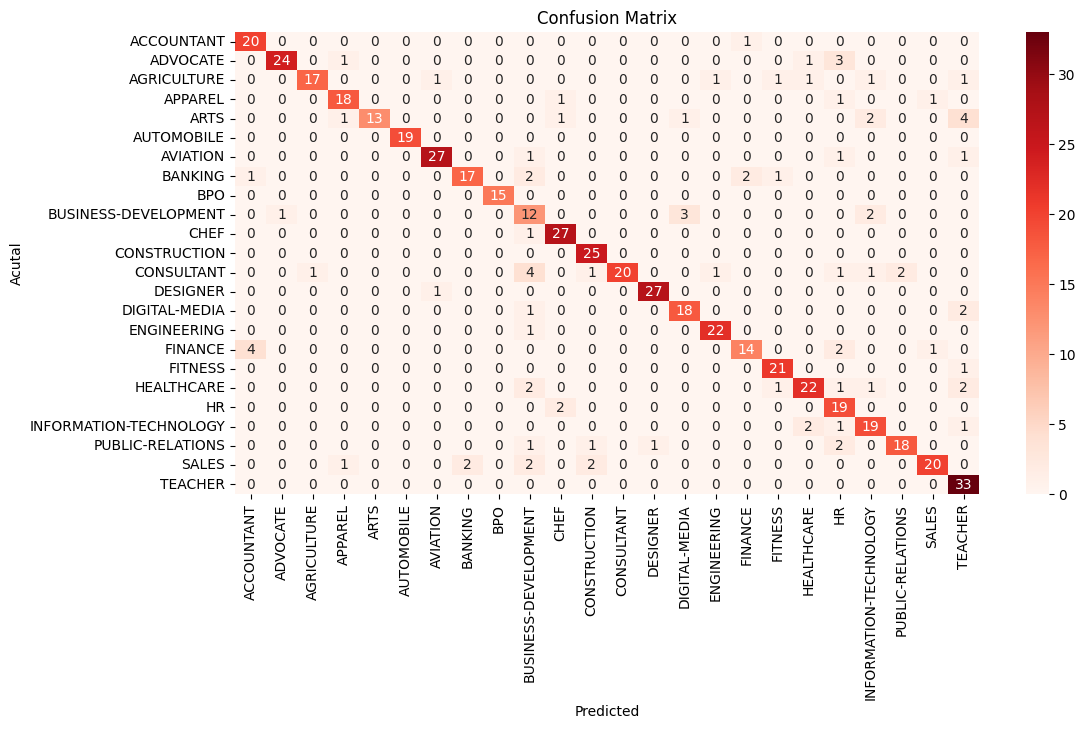

In [17]:
conf_matrix = confusion_matrix(Y_test,Y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds',xticklabels=rf_classifier.classes_,yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Acutal')
plt.title("Confusion Matrix")

In [18]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText



def predict_category(resume_text):
    resume_text = cleanResume(resume_text)
    resume_tfidf= tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [19]:
resume_file="hr specialist hr operations summary media professional background communications marketing human resources technology experience current hr specialist hr operations company name city state managed communication regarding launch operations group policy changes system outages designed standard work job aids create comprehensive training program new employees contractors audited job postings old pending hold draft positions audited union hourly union hourly salary background checks drug screens conducted monthly new hire benefits briefing new employees business units served link hr managers vendors handling questions resolving system related issues provide real time process improvement feedback key metrics initiatives successfully branded hr operations sharepoint site business unit project manager rfi rfp check drug screen vendor marketing communications co op company name city state posted new articles changes updates corporate sharepoint site including graphics visual communications researched drafted articles feature stories promote company activities programs co edited developed content quarterly published newsletter provided communication support internal external events collaborated communication team media professionals vendors determine program needs print materials web design digital communications entrusted lead product service software launches digital asset management tool marketing toolkit website executive tradeshows calendar created presentations management executive approval ensure alignment corporate guidelines branding maintained mysikorsky sharepoint site provided timely solutions mitigate issues created story board produced video annual hands meeting relationship coordinator marketing specialist company name city state partnered vendor manage house advertising program consisting print media collateral pieces coordinated pre show post show activities trade shows managed marketing campaigns generate new business support partner sales teams ordered marketing collateral meetings trade shows advisors improved administered modified marketing programs increase product awareness assisted preparing internal promotional publications managed marketing material inventory supervised distribution publications ensure high quality product output coordinated marketing materials including brochures promotional materials products partnered graphic designers develop appropriate materials branding brochures used tracking reporting systems sales leads appointments assistant head teller company name city state received internal audit score performed daily monthly audits atm machines tellers educated customers variety retail products available credit options consistently met exceeded quarterly sales goals promoted products services customers maintaining company brand identity implemented programs achieve exceed customer company participation goals organized company sponsored events campus resulting increased brand awareness coached peers proper use programs improve work flow efficiency utilized product knowledge successfully sell refer clients based individual needs promoted marketing grand opening new branch locations strengthen company brand affinity organized company sponsored events resulting increased brand awareness improved sales coached peers proper use programs increase work flow efficiency senior producer shu media exchange company name city state planned executed event focusing connecticut creative corridor growth industry opportunities come development panel industry professionals addressed topics related media hosted question answer session approximately attendees following forum guests invited engage networking conversation post event reception education master arts corporate communication public relations sacred heart university city state bachelor arts relational communication western connecticut state university city state skills adobe photoshop adp asset management branding brochures content customer care final cut pro graphics graphic hr illustrator indesign innovation inventory lotus notes marketing marketing materials marketing material materials microsoft office sharepoint newsletter presentations process improvement project management promotional materials publications quality real time recruitment reporting rfp sales stories employee development video web design website articles"
predicted_category = predict_category(resume_file)
print("predicted category:", predicted_category)

predicted category: HR


In [20]:
resume_file = """Objective:
A creative and detail-oriented Designer with a passion for visual communication and brand identity seeking opportunities to leverage design skills in a dynamic and collaborative environment.

Education:
- Bachelor of Fine Arts in Graphic Design, XYZ College, GPA: 3.7/4.0
- Diploma in Web Design, ABC Institute, GPA: 3.9/4.0

Skills:
- Proficient in Adobe Creative Suite (Photoshop, Illustrator, InDesign)
- Strong understanding of typography, layout, and color theory
- Experience in both print and digital design
- Ability to conceptualize and execute design projects from concept to completion
- Excellent attention to detail and time management skills

Experience:
Graphic Designer | XYZ Design Studio
- Created visually appealing graphics for various marketing materials, including brochures, flyers, and social media posts
- Collaborated with clients to understand their design needs and deliver creative solutions that align with their brand identity
- Worked closely with the marketing team to ensure consistency in brand messaging across all platforms

Freelance Designer
- Designed logos, branding materials, and website layouts for small businesses and startups
- Managed multiple projects simultaneously while meeting tight deadlines and maintaining quality standards
- Established and maintained strong client relationships through clear communication and exceptional service

Projects:
- Rebranding Campaign for XYZ Company: Led a team to redesign the company's logo, website, and marketing collateral, resulting in a 30% increase in brand recognition
- Packaging Design for ABC Product Launch: Developed eye-catching packaging designs for a new product line, contributing to a successful launch and positive customer feedback

Certifications:
- Adobe Certified Expert (ACE) in Adobe Illustrator
- Responsive Web Design Certification from Udemy

Languages:
- English (Native)
- Spanish (Intermediate)
"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: DESIGNER


In [21]:

resume_file = """Objective:
Dedicated and results-oriented Banking professional with a strong background in financial analysis and customer service seeking opportunities to contribute to a reputable financial institution. Eager to leverage expertise in risk management, investment strategies, and relationship building to drive business growth and client satisfaction.

Education:
- Bachelor of Business Administration in Finance, XYZ University, GPA: 3.8/4.0
- Certified Financial Analyst (CFA) Level I Candidate

Skills:
- Proficient in financial modeling and analysis using Excel, Bloomberg Terminal, and other financial software
- Extensive knowledge of banking products and services, including loans, mortgages, and investment products
- Strong understanding of regulatory compliance and risk management practices in the banking industry
- Excellent communication and interpersonal skills, with a focus on building rapport with clients and colleagues
- Ability to work efficiently under pressure and adapt to changing market conditions

Experience:
Financial Analyst | ABC Bank
- Conducted financial analysis and risk assessment for corporate clients, including credit analysis, financial statement analysis, and cash flow modeling
- Developed customized financial solutions to meet clients' needs and objectives, resulting in increased revenue and client retention
- Collaborated with cross-functional teams to identify new business opportunities and optimize existing processes

Customer Service Representative | DEF Bank
- Provided exceptional customer service to bank clients, addressing inquiries, resolving issues, and promoting banking products and services
- Processed transactions accurately and efficiently, including deposits, withdrawals, and account transfers
- Educated customers on various banking products and services, helping them make informed financial decisions

Internship | GHI Investments
- Assisted portfolio managers with investment research and analysis, including industry and company-specific research, financial modeling, and performance analysis
- Prepared investment presentations and reports for clients, highlighting investment opportunities and performance metrics
- Conducted market research and analysis to identify trends and opportunities in the financial markets

Certifications:
- Certified Financial Planner (CFP)
- Series 7 and Series 63 Securities Licenses

Languages:
- English (Native)
- Spanish (Proficient)

"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: BANKING


In [22]:
import pickle
pickle.dump(rf_classifier,open('../models/rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('../models/tfidf_vectorizer_categorization.pkl','wb'))
